# Credit Risk

https://drive.google.com/file/d/18fuLcW2ZSi4gz_ENkDFpySuS5s53GNYf/view?usp=sharing

El conjunto de datos proporcionado representa información sobre riesgo crediticio generada por un banco internacional con operaciones en Argentina. Estos datos han sido transformados y enriquecidos para reflejar diferentes situaciones y comportamientos de pago de los clientes que podrían afectar la precisión de los modelos de predicción de riesgos. El ejercicio consiste en identificar y analizar posibles sesgos en variables clave del conjunto de datos, tales como la edad del cliente, el monto del préstamo y el tipo de empleo, utilizando métodos de estadística descriptiva, pruebas de hipótesis y visualizaciones.


**Parte 1: Comprensión y Preparación de Datos**

Explorar el conjunto de datos. Utiliza métodos descriptivos para obtener una comprensión general de las características del conjunto de datos (por ejemplo, .describe(), .info()). Identificar valores atípicos. Genera estadísticas descriptivas y visualizaciones (boxplots, scatter plots) para identificar outliers en 'monto_del_prestamo'.

**Parte 2: Análisis Exploratorio de Datos**
Análisis de sesgos por edad. Usa groupby para calcular la tasa de incumplimiento promedio por grupo de edad. Crea histogramas de edad para deudores y no deudores. Realiza un t-test para comparar las tasas de incumplimiento entre menores de edad y otros grupos de edad. Análisis de sesgos por monto del préstamo. Genera histogramas de 'monto_del_prestamo' para visualizar la distribución de los montos para deudores y no deudores. Compara las distribuciones de 'monto_del_prestamo' entre buenos y malos pagadores con un t-test. Análisis de sesgos por tipo de empleo. Usa groupby para comparar las tasas de incumplimiento entre diferentes tipos de empleo. Explora la relación entre el estado laboral y la tasa de incumplimiento con visualizaciones adecuadas.

**Parte 3: Preparación de Datos para Modelado**
Limpieza de Datos. Asegúrate de que todos los datos estén correctamente codificados y de que no haya valores faltantes o irrelevantes en el conjunto de datos.
Selección de Características. Decide qué variables incluir en el modelo. Considera excluir variables con sesgos introducidos artificialmente para evaluar su impacto en el rendimiento del modelo.

**Parte 4: Modelado**
Entrenar un Modelo de Clasificación. Utiliza DecisionTreeClassifier para entrenar un modelo predictivo con los datos procesados.
Evaluación del Modelo. Genera una matriz de confusión para evaluar el rendimiento del modelo. Calcula la precisión, el recall y la exactitud del modelo.



In [666]:
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import seaborn as sns

In [667]:
df_credit_risk = pd.read_csv("/Users/lolonastri/Desktop/POO_UCEMA/modelos_segundo_parcial/credit_risk/credit_risk.csv")
df_credit_risk = df_credit_risk.copy()

In [668]:
df_credit_risk.head()

,,incumplimiento,tipo_de_cuenta,genero,edad_del_cliente,co_solicitantes,dependientes,monto_del_prestamo,ubicacion_de_sucursal,nivel_de_producto,estatus_laboral,es_sostenedor_principal,grupo_de_puntaje_crediticio,area_residencial,estado_actual_de_la_cuenta,tiene_cuenta_conjunta,indicador_aleatorio,residencial_Rural,residencial_Suburbana,residencial_Urbana
0,0,1.0,3,male,26.618129,1,0,7.2500,Suburbana,Third,man,True,,Urbana,no,0,0.9494354298674084,0.0,0.0,1.0
1,1,1.0,3,female,27.395476,1,0,71.2833,Central,First,woman,False,C,Urbana,yes,0,0.0152425151741839,0.0,0.0,1.0
2,2,1.0,1,female,48.696543,0,0,7.9250,Suburbana,Third,woman,False,,Rural,yes,1,0.6723719434749519,1.0,0.0,0.0
3,3,1.0,3,female,25.491890,1,0,53.1000,Suburbana,First,woman,False,C,Urbana,yes,0,0.4035980372889746,0.0,0.0,1.0
4,4,0.0,1,male,41.038217,0,0,8.0500,Suburbana,Third,man,True,,Suburbana,no,1,0.8529009409462249,0.0,1.0,0.0


___

## **Parte 1: Comprensión y Preparación de Datos**

In [669]:
df_credit_risk.columns

Index(['    ', 'incumplimiento ', 'tipo_de_cuenta ', 'genero ',
       'edad_del_cliente   ', 'co_solicitantes ', 'dependientes ',
       'monto_del_prestamo ', 'ubicacion_de_sucursal ', 'nivel_de_producto ',
       'estatus_laboral          ', 'es_sostenedor_principal ',
       'grupo_de_puntaje_crediticio ', 'area_residencial ',
       'estado_actual_de_la_cuenta ', 'tiene_cuenta_conjunta ',
       'indicador_aleatorio    ', 'residencial_Rural ',
       'residencial_Suburbana ', 'residencial_Urbana'],
      dtype='object')

In [670]:
from funciones.eda_y_ml import whitespace_remover_and_columns
df_credit_risk = whitespace_remover_and_columns(df_credit_risk)

### → Validación de la data

In [671]:
df_credit_risk.columns

Index(['', 'incumplimiento', 'tipo_de_cuenta', 'genero', 'edad_del_cliente',
       'co_solicitantes', 'dependientes', 'monto_del_prestamo',
       'ubicacion_de_sucursal', 'nivel_de_producto', 'estatus_laboral',
       'es_sostenedor_principal', 'grupo_de_puntaje_crediticio',
       'area_residencial', 'estado_actual_de_la_cuenta',
       'tiene_cuenta_conjunta', 'indicador_aleatorio', 'residencial_Rural',
       'residencial_Suburbana', 'residencial_Urbana'],
      dtype='object')

In [672]:
print("El dataset tiene " + str(df_credit_risk.shape[0])+ " filas.")
print("El dataset tiene " + str(df_credit_risk.shape[1])+ " columnas.")

El dataset tiene 1906 filas.
El dataset tiene 20 columnas.


In [673]:
from funciones.eda_y_ml import validate_columns 
validate_columns(df_credit_risk)

,Unique_Values,Num_Unique_Values,Num_Null_Values,%_Null_Values,Sample_Unique_Values
,NaN,1906.0,0,0.0,"[144, 380, 769, 43, 484]"
incumplimiento,NaN,1906.0,0,0.0,"[0.0, 0.0, 1.0, 0.0, 0.0]"
tipo_de_cuenta,6,1906,0,0.0,"[Ahorro, 1, 3, Ahorro, Ahorro]"
genero,4,1906,0,0.0,"[Hombre, female, male, Mujer, Mujer]"
edad_del_cliente,NaN,1906.0,0,0.0,"[23.0, 47.52699895150855, 25.337584285871625, ..."
co_solicitantes,NaN,1906.0,0,0.0,"[2, 0, 0, 1, 1]"
dependientes,NaN,1906.0,0,0.0,"[2, 0, 0, 0, 0]"
monto_del_prestamo,NaN,1906.0,0,0.0,"[12374.0, 227.525, 8.3625, 16235.0, 49920.0]"
ubicacion_de_sucursal,7,1906,0,0.0,"[Suiza, Central, Suburbana, Suiza, Suiza]"
nivel_de_producto,6,1906,0,0.0,"[Intermedio, First, Third, Basico, Intermedio]"


In [674]:
df_credit_risk.describe()

,,incumplimiento,edad_del_cliente,co_solicitantes,dependientes,monto_del_prestamo
count,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000,1906.000000
mean,477.158972,0.244491,44.572590,0.772298,1.228227,13629.753908
std,277.177678,0.429898,18.993413,0.995311,1.416017,16618.634074
min,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000
25%,238.000000,0.000000,27.000000,0.000000,0.000000,15.743775
50%,476.000000,0.000000,45.320818,0.000000,1.000000,3550.500000
75%,714.000000,0.000000,53.713813,1.000000,2.000000,26848.750000
max,999.000000,1.000000,89.000000,8.000000,6.000000,63610.000000


___

### →  Veo los tipos de datos con dtypes

In [675]:
df_credit_risk.head()

,,incumplimiento,tipo_de_cuenta,genero,edad_del_cliente,co_solicitantes,dependientes,monto_del_prestamo,ubicacion_de_sucursal,nivel_de_producto,estatus_laboral,es_sostenedor_principal,grupo_de_puntaje_crediticio,area_residencial,estado_actual_de_la_cuenta,tiene_cuenta_conjunta,indicador_aleatorio,residencial_Rural,residencial_Suburbana,residencial_Urbana
0,0,1.0,3,male,26.618129,1,0,7.2500,Suburbana,Third,man,True,,Urbana,no,0,0.9494354298674084,0.0,0.0,1.0
1,1,1.0,3,female,27.395476,1,0,71.2833,Central,First,woman,False,C,Urbana,yes,0,0.0152425151741839,0.0,0.0,1.0
2,2,1.0,1,female,48.696543,0,0,7.9250,Suburbana,Third,woman,False,,Rural,yes,1,0.6723719434749519,1.0,0.0,0.0
3,3,1.0,3,female,25.491890,1,0,53.1000,Suburbana,First,woman,False,C,Urbana,yes,0,0.4035980372889746,0.0,0.0,1.0
4,4,0.0,1,male,41.038217,0,0,8.0500,Suburbana,Third,man,True,,Suburbana,no,1,0.8529009409462249,0.0,1.0,0.0


In [676]:
df_credit_risk.dtypes

                                 int64
incumplimiento                 float64
tipo_de_cuenta                  object
genero                          object
edad_del_cliente               float64
co_solicitantes                  int64
dependientes                     int64
monto_del_prestamo             float64
ubicacion_de_sucursal           object
nivel_de_producto               object
estatus_laboral                 object
es_sostenedor_principal         object
grupo_de_puntaje_crediticio     object
area_residencial                object
estado_actual_de_la_cuenta      object
tiene_cuenta_conjunta           object
indicador_aleatorio             object
residencial_Rural               object
residencial_Suburbana           object
residencial_Urbana              object
dtype: object

#### La edad no puede estar en formato float, por lo que la convierto a int.

In [677]:
df_credit_risk["edad_del_cliente"] = df_credit_risk["edad_del_cliente"].astype(int)

___

### → Valores outliers

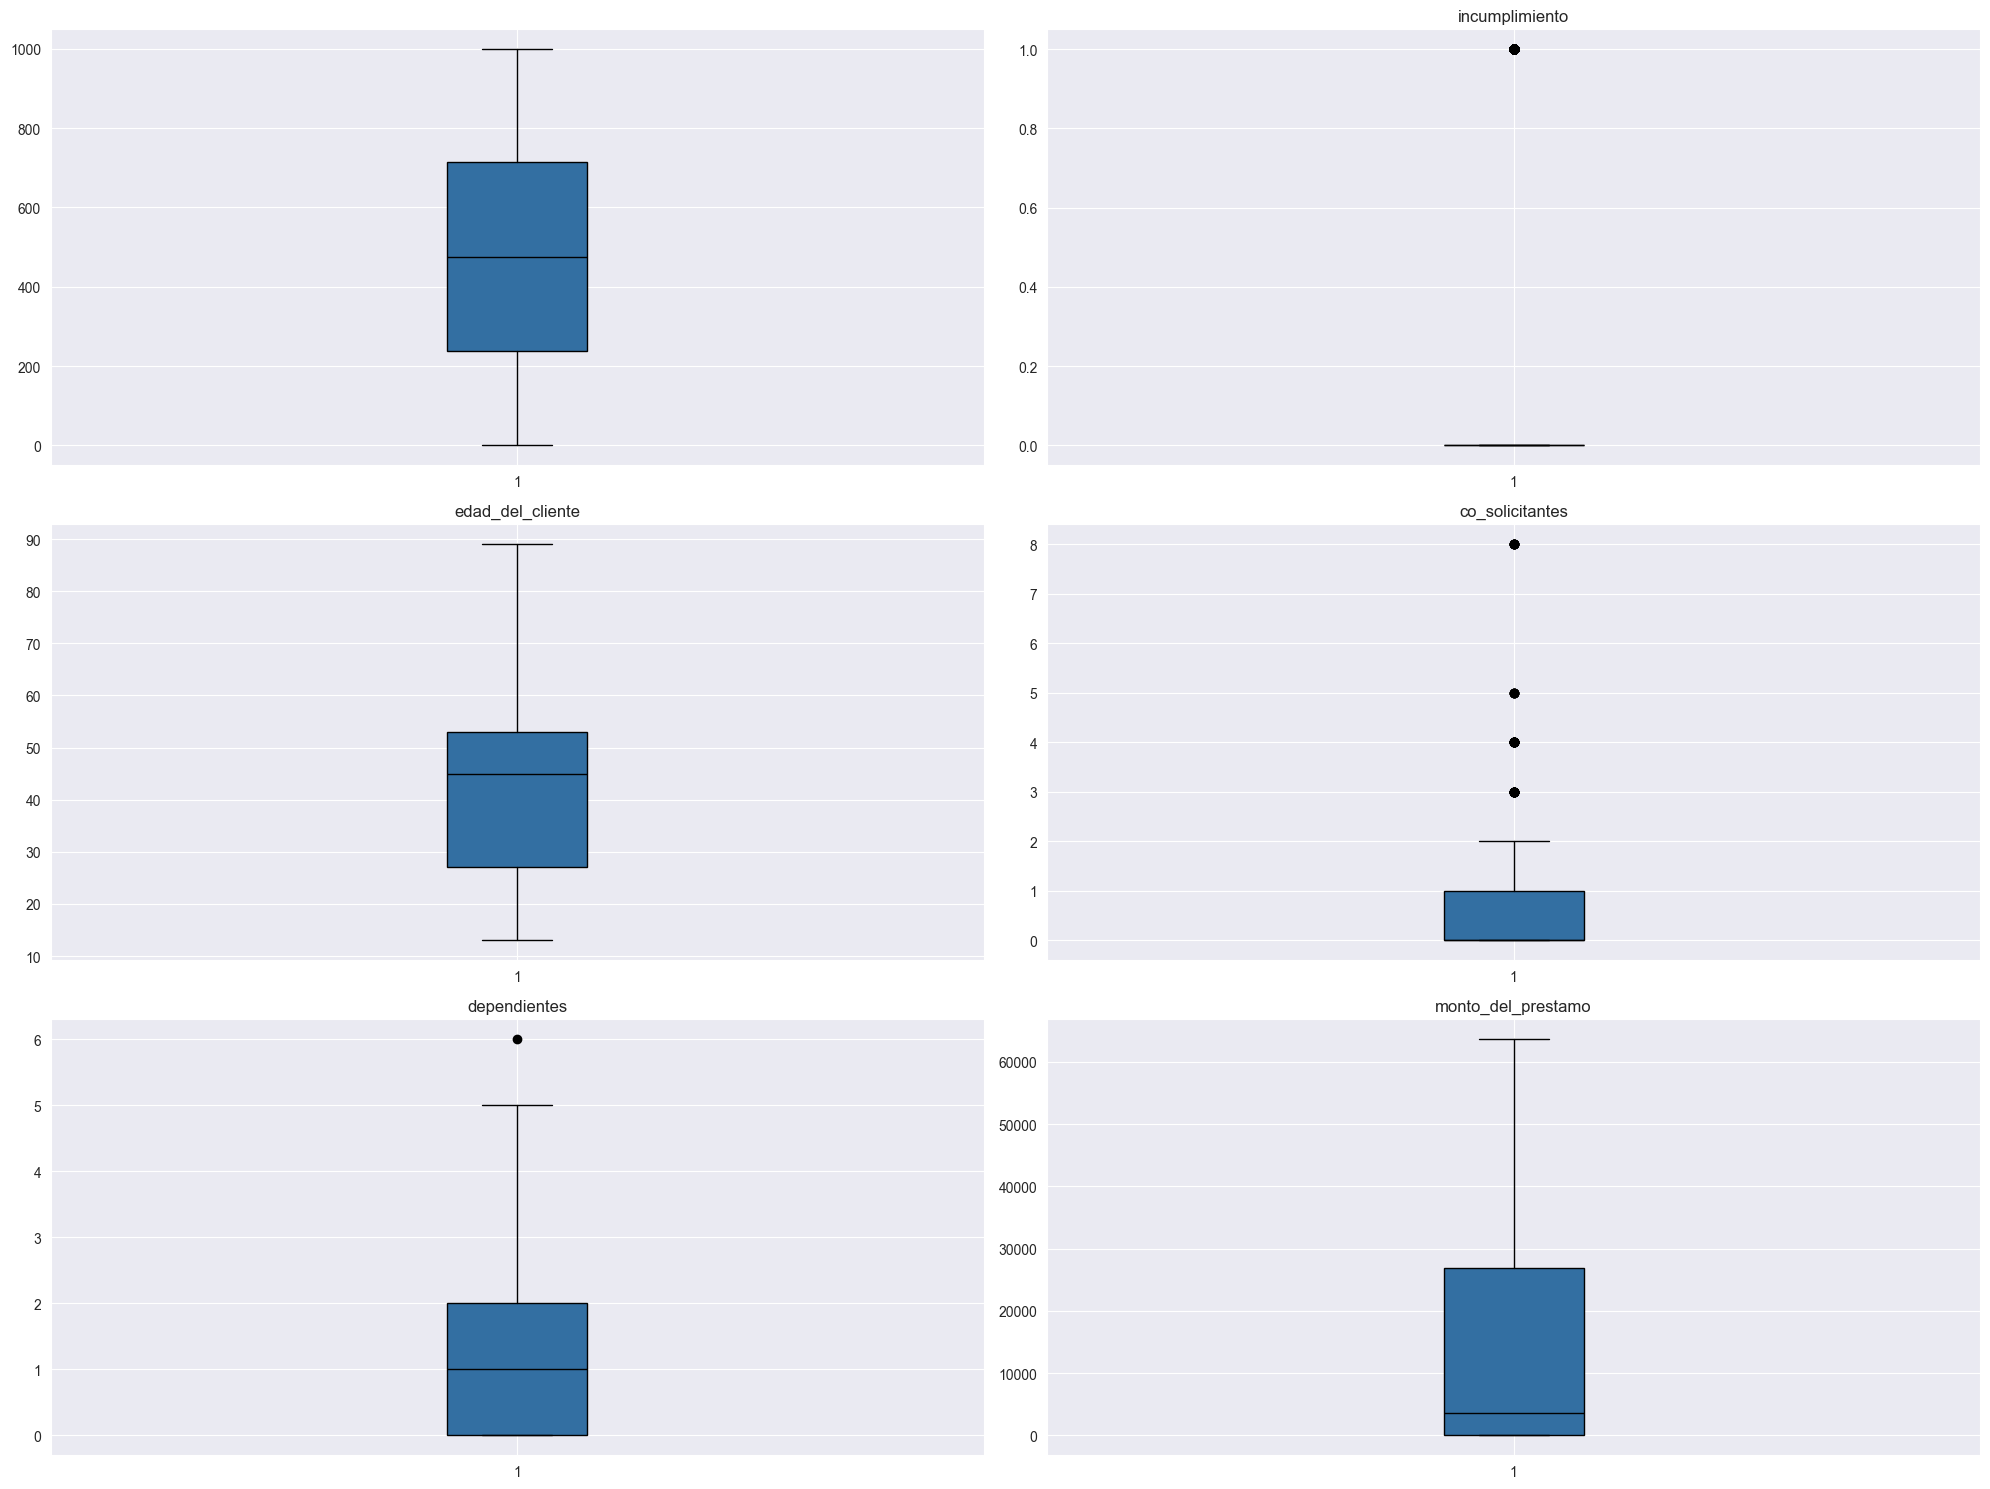

In [678]:
from funciones.eda_y_ml import plot_outliers
plot_outliers(df_credit_risk)

#### Para este análisis he tomado la decisión de no remover los outliers, ya que son valores que pueden ser reales y no errores de carga de datos. Además, al ser un dataset de créditos, es posible que existan valores altos de monto de préstamo.

____

## **Parte 2: Análisis Exploratorio de Datos**


### → Análisis de sesgos por edad. Usa groupby para calcular la tasa de incumplimiento promedio por grupo de edad. 

In [679]:
df_credit_risk["incumplimiento"].value_counts() # Miro cuantos cumplieron y cuantos no

incumplimiento
0.0    1440
1.0     466
Name: count, dtype: int64

In [680]:
tasa_de_incumplimiento_etaria = round(df_credit_risk.groupby("edad_del_cliente").agg({"incumplimiento" : "mean"}).reset_index(), 2)
tasa_de_incumplimiento_etaria # Tasa de incumplimiento promedio por grupo de edad

,edad_del_cliente,incumplimiento
0,13,1.00
1,16,1.00
2,17,1.00
3,18,0.56
4,19,0.41
...,...,...
70,85,0.00
71,86,0.00
72,87,0.00
73,88,0.00


<Axes: xlabel='edad_del_cliente', ylabel='incumplimiento'>

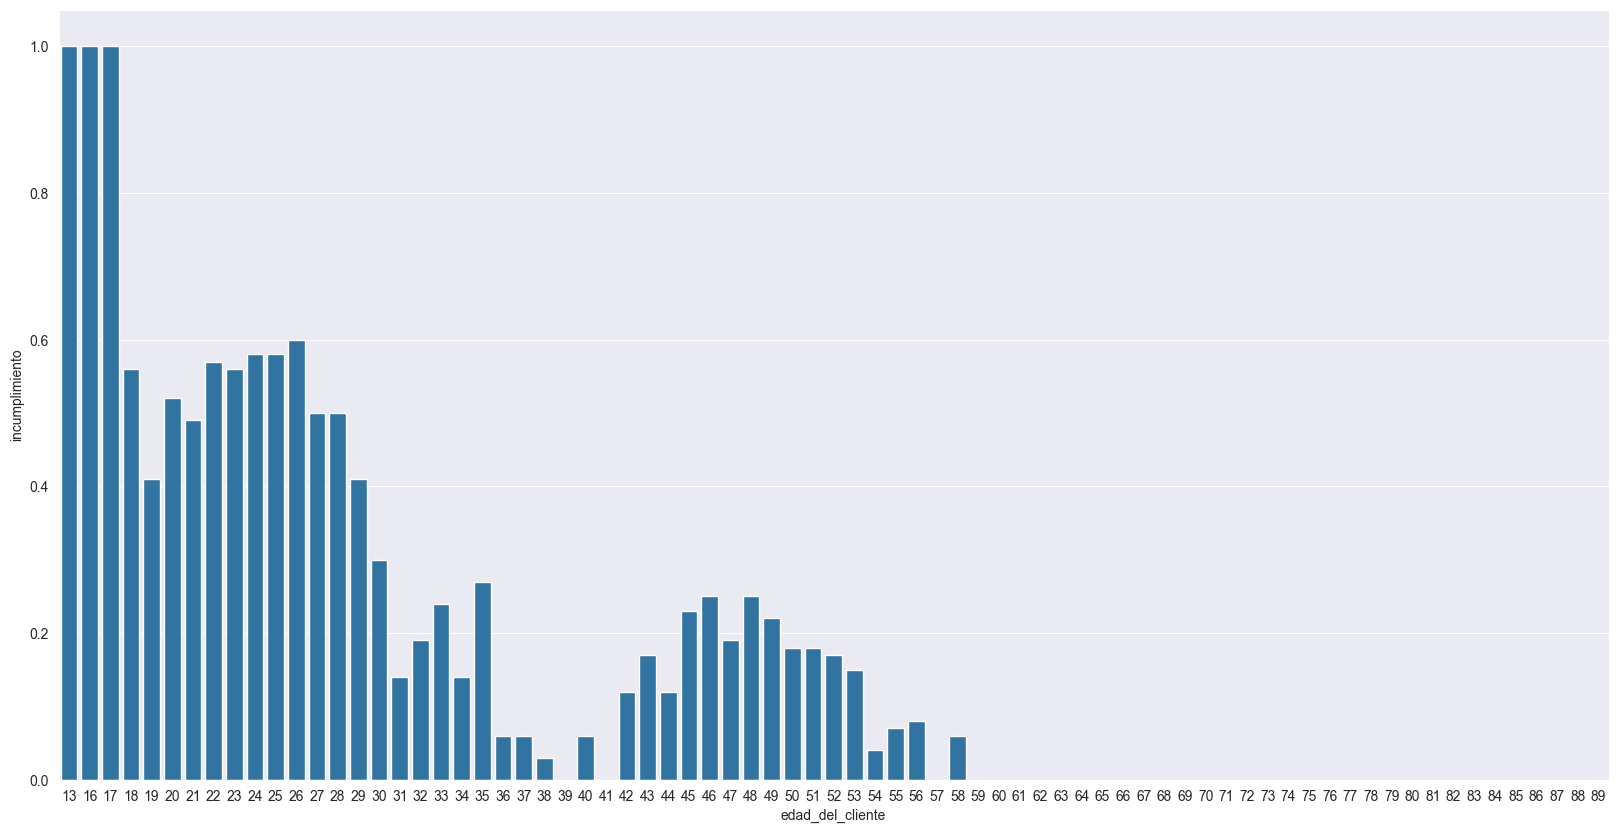

In [681]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.barplot(data=tasa_de_incumplimiento_etaria, x="edad_del_cliente", y="incumplimiento")

#### En este gráfico de barras se pueden identificar 3 grupos de clientes. Los que tienen entre 13 y 17 años, los que tienen entre 18 y 58 años y los que tienen más de 58 años.
#### Los clientes que tienen entre 13 y 17 años no pagan, mientras que los que tienen entre 18 y 58 años si pagan (con una tasa baja de incumplimiento). Luego, a partir de los 58 años, pagan todos.

Text(0, 0.5, 'Frecuencia')

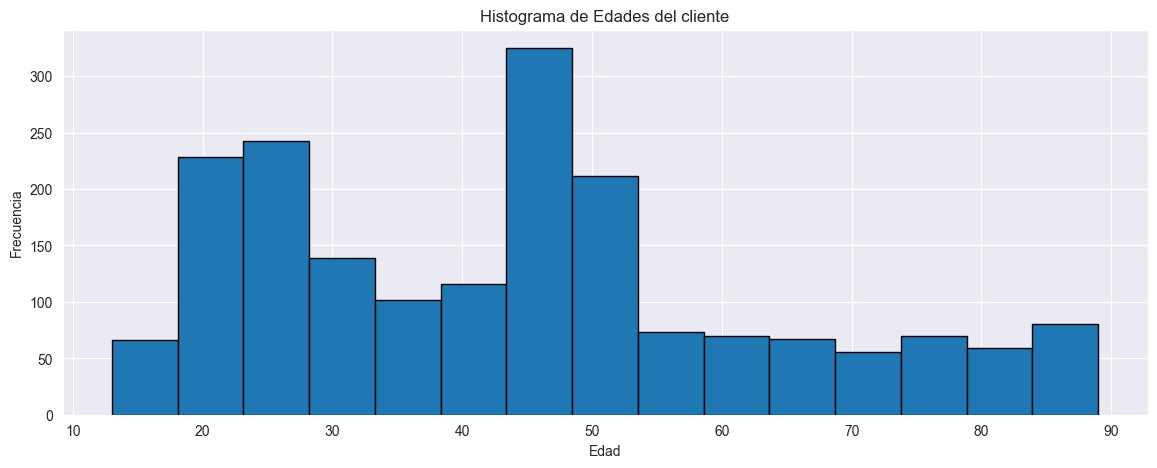

In [682]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.hist(df_credit_risk['edad_del_cliente'], bins=15, edgecolor='black')
plt.title('Histograma de Edades del cliente')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

### → Crea histogramas de edad para deudores y no deudores.

/var/folders/xx/hcklcr8s0rxd7p5fz63z342w0000gn/T/ipykernel_26431/2283688562.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_credit_risk[filtro1]['edad_del_cliente'], label="buen_pagador", color="green")
/var/folders/xx/hcklcr8s0rxd7p5fz63z342w0000gn/T/ipykernel_26431/2283688562.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147

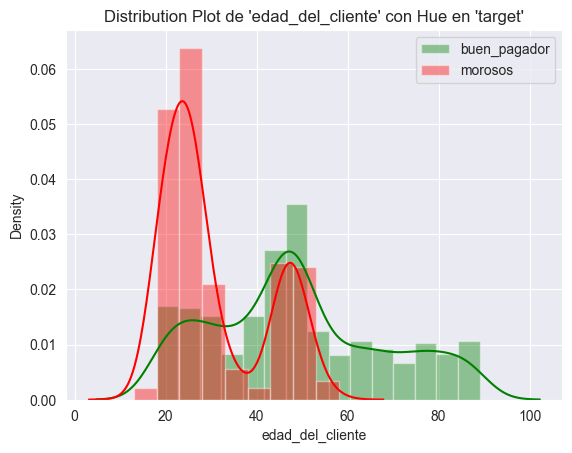

In [683]:
sns.set_style('darkgrid')

filtro1 = df_credit_risk["incumplimiento"] == 0
filtro2 = df_credit_risk["incumplimiento"] == 1

sns.distplot(df_credit_risk[filtro1]['edad_del_cliente'], label="buen_pagador", color="green")
sns.distplot(df_credit_risk[filtro2]['edad_del_cliente'], label="morosos", color="red")

plt.title("Distribution Plot de 'edad_del_cliente' con Hue en 'target'")
plt.legend()
plt.show()

### → Realiza un t-test para comparar las tasas de incumplimiento entre menores de edad y otros grupos de edad. 

In [684]:
def grupo_etario (x):
    if x <= 18:
        return "menor"
    elif 18 < x <= 30:
        return "joven adulto"
    elif 30 < x < 50:
        return "adulto"
    elif x >= 50:
        return "mayor"
    

df_credit_risk["grupo_etario"] = df_credit_risk["edad_del_cliente"].apply(grupo_etario)
    

##### Comparación entre menores y mayores


In [685]:
adolescentes = df_credit_risk[df_credit_risk["grupo_etario"] == "menor"] # Grupo 1
mayores = df_credit_risk[df_credit_risk["grupo_etario"] == "mayor"] # Grupo 2

In [686]:
from scipy.stats import ttest_ind

group1 = adolescentes["incumplimiento"]
group2 = mayores["incumplimiento"]

t_stat, p_value = ttest_ind(group1, group2)

if p_value < 0.05:
    print("Rechazar la hipótesis nula. Hay una diferencia significativa de la tasa de incumplimiento entre los menores y los mayores.")
else:
    print("No rechazar la hipótesis nula. No hay diferencias significativas entre la tasa de incumplimiento de ambos grupos")

Rechazar la hipótesis nula. Hay una diferencia significativa de la tasa de incumplimiento entre los menores y los mayores.


##### Comparación entre jóvenes adultos y adultos

In [687]:
jovenes_adultos = df_credit_risk[df_credit_risk["grupo_etario"] == "joven adulto"] # Grupo 3
adultos = df_credit_risk[df_credit_risk["grupo_etario"] == "adulto"] # Grupo 4

In [688]:
group3 = jovenes_adultos["incumplimiento"]
group4 = adultos["incumplimiento"]

t_stat, p_value = ttest_ind(group3, group4)

if p_value < 0.05:
    print("Rechazar la hipótesis nula. Hay una diferencia significativa de la tasa de incumplimiento entre los jóvenes adultos y los adultos.")
else:
    print("No rechazar la hipótesis nula. No hay diferencias significativas entre la tasa de incumplimiento de ambos grupos")

Rechazar la hipótesis nula. Hay una diferencia significativa de la tasa de incumplimiento entre los jóvenes adultos y los adultos.


### → Análisis de sesgos por monto del préstamo. Genera histogramas de 'monto_del_prestamo' para visualizar la distribución de los montos para deudores y no deudores.


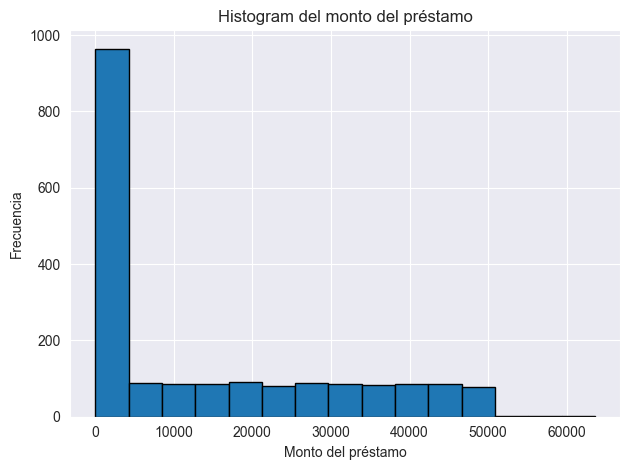

In [689]:
plt.figsize=(14, 5)
plt.hist(df_credit_risk['monto_del_prestamo'], bins=15, edgecolor='black')
plt.title('Histogram del monto del préstamo')
plt.xlabel('Monto del préstamo')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


In [690]:
deudores = df_credit_risk[df_credit_risk["incumplimiento"] == 1]
buenos_pagadores = df_credit_risk[df_credit_risk["incumplimiento"] == 0]

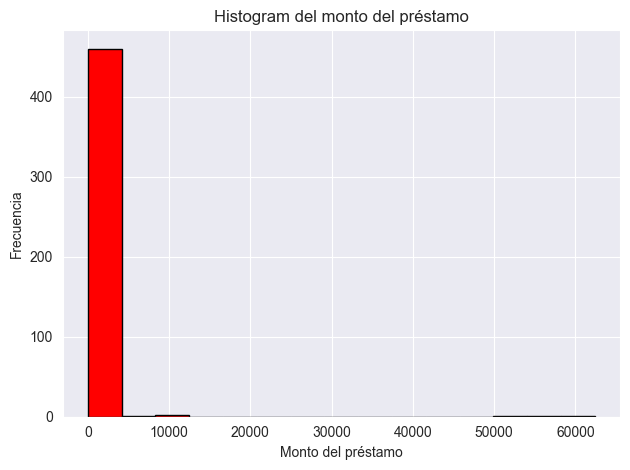

In [691]:
plt.figsize=(14, 5)
plt.hist(deudores["monto_del_prestamo"], bins=15, edgecolor='black', color="red")
plt.title('Histogram del monto del préstamo')
plt.xlabel('Monto del préstamo')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


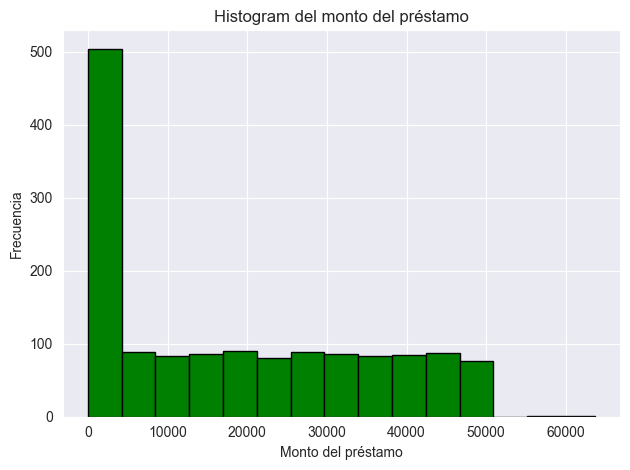

In [692]:
plt.figsize=(14, 5)
plt.hist(buenos_pagadores["monto_del_prestamo"], bins=15, edgecolor='black', color="green")
plt.title('Histogram del monto del préstamo')
plt.xlabel('Monto del préstamo')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


/var/folders/xx/hcklcr8s0rxd7p5fz63z342w0000gn/T/ipykernel_26431/1093310498.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(buenos_pagadores["monto_del_prestamo"], label="buen_pagador", color="green")
/var/folders/xx/hcklcr8s0rxd7p5fz63z342w0000gn/T/ipykernel_26431/1093310498.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed297

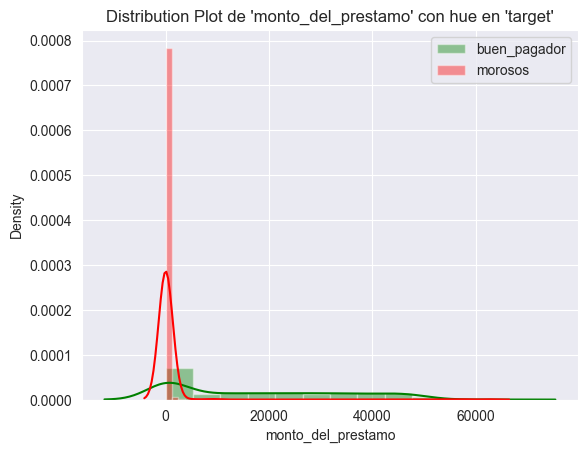

In [693]:
sns.set_style('darkgrid')

buenos_pagadores = df_credit_risk[df_credit_risk["incumplimiento"] == 0]
deudores = df_credit_risk[df_credit_risk["incumplimiento"] == 1]

sns.distplot(buenos_pagadores["monto_del_prestamo"], label="buen_pagador", color="green")
sns.distplot(deudores["monto_del_prestamo"], label="morosos", color="red")

plt.title("Distribution Plot de 'monto_del_prestamo' con hue en 'target'")
plt.legend()
plt.show()

<Axes: ylabel='monto_del_prestamo'>

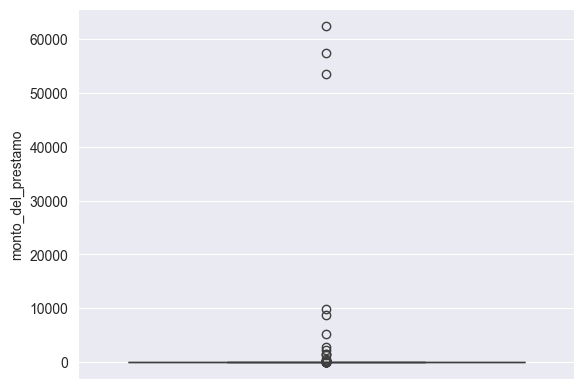

In [694]:
sns.boxplot(deudores["monto_del_prestamo"])

<Axes: ylabel='monto_del_prestamo'>

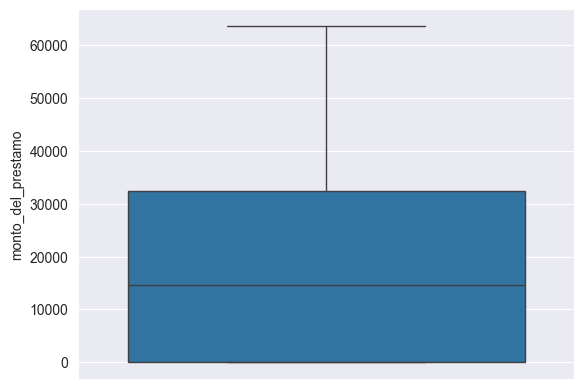

In [695]:
sns.boxplot(buenos_pagadores["monto_del_prestamo"])

### → Compara las distribuciones de 'monto_del_prestamo' entre buenos y malos pagadores con un t-test. 

In [696]:
from scipy.stats import ttest_ind

grupo1 = deudores["monto_del_prestamo"]
grupo2 = buenos_pagadores["monto_del_prestamo"]

t_stat, p_value = ttest_ind(grupo1, grupo2)

if p_value < 0.05:
    print("Rechazar la hipótesis nula. Hay una diferencia significativa en el monto del prestamo entre los deudores y los no deudores.")
else:
    print("No rechazar la hipótesis nula. No hay diferencias significativas entre la tasa de incumplimiento de ambos grupos")

Rechazar la hipótesis nula. Hay una diferencia significativa en el monto del prestamo entre los deudores y los no deudores.


### → Análisis de sesgos por tipo de empleo. Usa groupby para comparar las tasas de incumplimiento entre diferentes tipos de empleo. Explora la relación entre el estado laboral y la tasa de incumplimiento con visualizaciones adecuadas.

In [697]:
df_credit_risk["estatus_laboral"].value_counts() 

estatus_laboral
man                         538
Desempleo                   274
woman                       273
Estudiante                  255
Empleo                      249
Retirado                    222
child                        85
Desempleado                   8
Empleo a tiempo parcial       1
Empleo a tiempo completo      1
Name: count, dtype: int64

##### Procedemos a quedarnos solamente con 'Desempleado', 'Estudiante', 'Retirado' y 'Empleado'. Aquellos como 'man' y 'women' no van a formar parte de nuestro análisis ya que no tienen nada que ver con el estatus laboral. Además, aquellos en 'Desempleo' van a sumarse a 'Desempleado' y aquellos que están en 'Empleo a tiempo parcial/tiempo completo' van a sumarse a 'Empleo'.

In [698]:
def clean_estatus_laboral(df, column):
    mapping = {'Desempleo': 'Desempleado', 
               'Empleo a tiempo parcial': 'Empleo', 
               'Empleo a tiempo completo': 'Empleo'}
    df[column] = df[column].replace(mapping)
    df = df[df[column].isin(['Desempleado', 'Estudiante', 'Empleo', 'Retirado'])]
    return df

df_credit_risk = clean_estatus_laboral(df_credit_risk, "estatus_laboral")

In [699]:
df_credit_risk["estatus_laboral"].value_counts()

estatus_laboral
Desempleado    282
Estudiante     255
Empleo         251
Retirado       222
Name: count, dtype: int64

In [700]:
df_credit_risk.groupby("estatus_laboral").agg(cantidad_de_deudores = ("incumplimiento", "sum")).reset_index()

,estatus_laboral,cantidad_de_deudores
0,Desempleado,7.0
1,Empleo,1.0
2,Estudiante,0.0
3,Retirado,0.0


___

## **Parte 3: Preparación de Datos para Modelado**


### → Limpieza de Datos. Asegúrate de que todos los datos estén correctamente codificados y de que no haya valores faltantes o irrelevantes en el conjunto de datos. 

In [701]:
df_credit_risk["genero"].value_counts()

genero
Hombre    527
Mujer     473
female      6
male        4
Name: count, dtype: int64

In [702]:
def grouping_genders(df, column):
    mapping = {'female': 'Mujer', 
               'male': 'Hombre'}
    df[column] = df[column].replace(mapping)
    return df

df_credit_risk_cleaned = grouping_genders(df_credit_risk, "genero")

In [703]:
df_credit_risk_cleaned

,,incumplimiento,tipo_de_cuenta,genero,edad_del_cliente,co_solicitantes,dependientes,monto_del_prestamo,ubicacion_de_sucursal,nivel_de_producto,...,es_sostenedor_principal,grupo_de_puntaje_crediticio,area_residencial,estado_actual_de_la_cuenta,tiene_cuenta_conjunta,indicador_aleatorio,residencial_Rural,residencial_Suburbana,residencial_Urbana,grupo_etario
896,896,1.0,2,Hombre,17,1,0,2319.0,Central,First,...,False,E,Urbana,no,False,0.9676085021263028,,,,menor
897,897,1.0,3,Mujer,16,1,1,1475.0,Rural,Third,...,False,,Urbana,no,False,0.4507801480365124,,,,menor
898,898,1.0,1,Mujer,17,2,2,2871.0,Suburbana,Second,...,False,F,Urbana,yes,False,0.9858837997915444,,,,menor
899,899,1.0,3,Mujer,13,0,1,1526.0,Central,Third,...,False,F,Urbana,no,False,0.9786856989675388,,,,menor
900,900,1.0,1,Hombre,17,0,0,1245.0,Rural,Third,...,False,B,Urbana,no,False,0.3246109473632566,,,,menor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1901,995,0.0,Corriente,Hombre,56,0,1,35253.0,Suiza,Intermedio,...,False,9,Urbana,no,False,,,,,mayor
1902,996,0.0,Corriente,Mujer,66,0,4,14752.0,Suiza,Avanzado,...,False,2,Suburbana,no,True,,,,,mayor
1903,997,0.0,Inversiones,Hombre,34,1,2,21816.0,Suiza,Basico,...,True,10,Rural,yes,True,,,,,adulto
1904,998,0.0,Inversiones,Hombre,87,2,2,37871.0,Suiza,Basico,...,False,10,Suburbana,yes,False,,,,,mayor


___

In [704]:
df_credit_risk_cleaned["tipo_de_cuenta"].value_counts()

tipo_de_cuenta
Ahorro         355
Corriente      326
Inversiones    319
1                5
3                4
2                1
Name: count, dtype: int64

In [705]:
def joining_accounts(df, column):
    mapping = {'1': 'Ahorro', 
               '2': 'Corriente',
               '3': 'Inversiones'}
    df[column] = df[column].replace(mapping)
    return df

df_credit_risk_cleaned = joining_accounts(df_credit_risk, "tipo_de_cuenta")

___

In [706]:
df_credit_risk_cleaned["nivel_de_producto"].value_counts()

nivel_de_producto
Avanzado      349
Intermedio    329
Basico        322
First           4
Third           4
Second          2
Name: count, dtype: int64

In [707]:
def niveles_de_producto(df, column):
    mapping = {'First': 'Basico', 
               'Second': 'Intermedio',
               'Third': 'Avanzado'}
    df[column] = df[column].replace(mapping)
    return df

df_credit_risk_cleaned = niveles_de_producto(df_credit_risk, "nivel_de_producto")

___

In [708]:
df_credit_risk_cleaned["es_sostenedor_principal"].value_counts()

es_sostenedor_principal
True     512
False    498
Name: count, dtype: int64

In [709]:
df_credit_risk_cleaned["estado_actual_de_la_cuenta"].value_counts()

estado_actual_de_la_cuenta
yes    532
no     478
Name: count, dtype: int64

In [710]:
df_credit_risk_cleaned["tiene_cuenta_conjunta"].value_counts()

tiene_cuenta_conjunta
True     523
False    487
Name: count, dtype: int64

In [711]:
def map_values(df):
    mapping = {'yes': 1, 'True': 1, 'no': 0, 'False': 0}
    return df.applymap(lambda x: mapping.get(x, x))

df_credit_risk_cleaned = map_values(df_credit_risk_cleaned)

/var/folders/xx/hcklcr8s0rxd7p5fz63z342w0000gn/T/ipykernel_26431/3527016171.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df.applymap(lambda x: mapping.get(x, x))


In [712]:
df_credit_risk_cleaned

,,incumplimiento,tipo_de_cuenta,genero,edad_del_cliente,co_solicitantes,dependientes,monto_del_prestamo,ubicacion_de_sucursal,nivel_de_producto,...,es_sostenedor_principal,grupo_de_puntaje_crediticio,area_residencial,estado_actual_de_la_cuenta,tiene_cuenta_conjunta,indicador_aleatorio,residencial_Rural,residencial_Suburbana,residencial_Urbana,grupo_etario
896,896,1.0,Corriente,Hombre,17,1,0,2319.0,Central,Basico,...,0,E,Urbana,0,0,0.9676085021263028,,,,menor
897,897,1.0,Inversiones,Mujer,16,1,1,1475.0,Rural,Avanzado,...,0,,Urbana,0,0,0.4507801480365124,,,,menor
898,898,1.0,Ahorro,Mujer,17,2,2,2871.0,Suburbana,Intermedio,...,0,F,Urbana,1,0,0.9858837997915444,,,,menor
899,899,1.0,Inversiones,Mujer,13,0,1,1526.0,Central,Avanzado,...,0,F,Urbana,0,0,0.9786856989675388,,,,menor
900,900,1.0,Ahorro,Hombre,17,0,0,1245.0,Rural,Avanzado,...,0,B,Urbana,0,0,0.3246109473632566,,,,menor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1901,995,0.0,Corriente,Hombre,56,0,1,35253.0,Suiza,Intermedio,...,0,9,Urbana,0,0,,,,,mayor
1902,996,0.0,Corriente,Mujer,66,0,4,14752.0,Suiza,Avanzado,...,0,2,Suburbana,0,1,,,,,mayor
1903,997,0.0,Inversiones,Hombre,34,1,2,21816.0,Suiza,Basico,...,1,10,Rural,1,1,,,,,adulto
1904,998,0.0,Inversiones,Hombre,87,2,2,37871.0,Suiza,Basico,...,0,10,Suburbana,1,0,,,,,mayor


___

### → Selección de Características. Decide qué variables incluir en el modelo. Considera excluir variables con sesgos introducidos artificialmente para evaluar su impacto en el rendimiento del modelo.

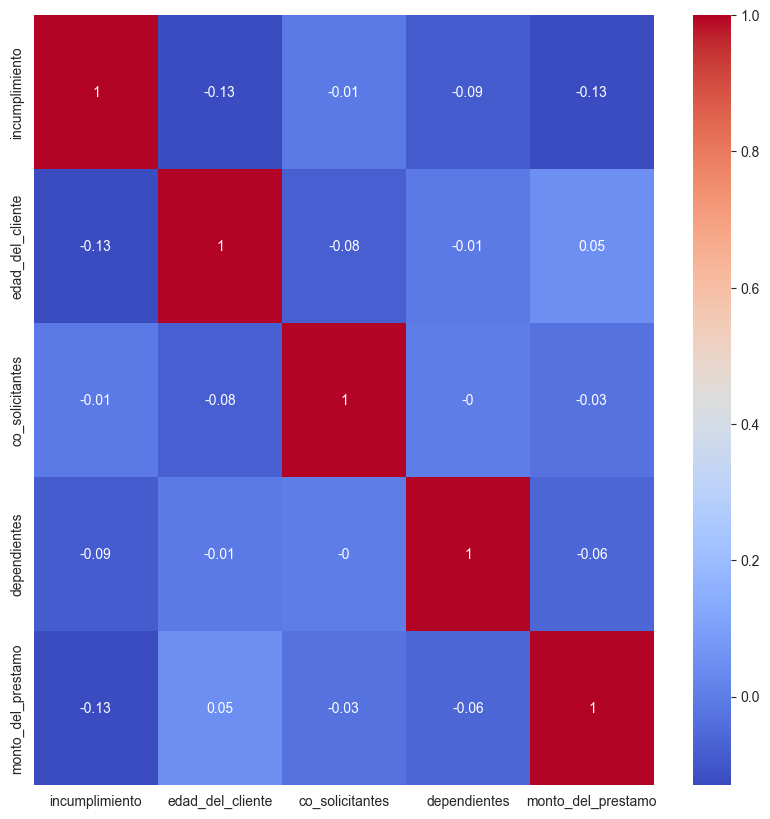

In [713]:
from funciones.eda_y_ml import crear_heatmap_correlacion
crear_heatmap_correlacion(df_credit_risk)

In [715]:
from sklearn.preprocessing import LabelEncoder
df_credit_risk_le = LabelEncoder()
df_credit_risk_le.fit(df_credit_risk_cleaned['grupo_etario'])
df_credit_risk_le.classes_

/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


array(['adulto', 'joven adulto', 'mayor', 'menor'], dtype=object)

___

## **Parte 4: Modelado**
### → Entrenar un Modelo de Clasificación. Utiliza DecisionTreeClassifier para entrenar un modelo predictivo con los datos procesados. Evaluación del Modelo. Genera una matriz de confusión para evaluar el rendimiento del modelo. Calcula la precisión, el recall y la exactitud del modelo.

___

# Generar modelo

In [714]:
# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier object
clf = DecisionTreeClassifier(max_depth=3)

# Train Decision Tree Classifier
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Creating a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculating metrics manually using the confusion matrix
tp, fn, fp, tn = conf_matrix.ravel()

# Metrics calculation
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0  # Handling the case where tp + fp is 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0     # Handling the case where tp + fn is 0

NameError: name 'X' is not defined